Analysis

1.Fares on rides in urban cities were, on average, less than those in suburban and rural cities. This may be due to the fact that in the latter two geographic areas, desired destinations (e.g. commerce and entertainment districts) are further away from residential areas. Increased mileage and time result in higher fares which we should expect in Surburban and Rural areas.


2.When looking at the percent break down of the total fare and number of rides, the numbers show that the proportion of riders and fare is closely correlated across all three city types.


3.Examining the third pie chart, percent break down of drivers in each of the three types, we are shown that this is not the case. Proportionally more drivers are needed in urban areas to maintain the near 1:1 relationship that exists between total fare and number of rides for each type.

In [1]:
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath_city = os.path.join('raw_data','city_data.csv')
filepath_ride = os.path.join('raw_data','ride_data.csv')

city_df = pd.read_csv(filepath_city)
ride_df = pd.read_csv(filepath_ride)

combo_df = city_df.merge(ride_df, how="outer", on='city', suffixes=('_city','_ride'))

# city_df.head()
# ride_df.head()
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
avg_fares = combo_df.groupby('city')['fare'].mean()
total_rides = combo_df.groupby('city')['ride_id'].count()
combo_series = pd.concat([avg_fares, total_rides], axis=1).reset_index()

total_drivers = combo_df[['city','driver_count','type']]
total_drivers = total_drivers.drop_duplicates()

combo_chart = combo_series.merge(total_drivers, how='outer', on='city')

cols = ['city','type','driver_count','ride_id','fare']
combo_chart = combo_chart[cols]
ren = {'city':'City','type':'City Type','driver_count':'No. of Drivers','ride_id':'No. of Rides','fare':'Avg Fare ($)'}
combo_chart = combo_chart.rename(columns=ren)
combo_chart.head()

by_type_df = combo_chart.set_index('City Type')
urban_df = by_type_df.loc['Urban']
suburban_df = by_type_df.loc['Suburban']
rural_df = by_type_df.loc['Rural']

#urban_df.head()

<Figure size 1440x1280 with 0 Axes>

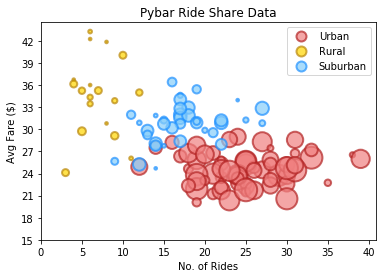

<Figure size 1440x1280 with 0 Axes>

In [30]:
plt.scatter(urban_df['No. of Rides'], urban_df['Avg Fare ($)'], s=urban_df['No. of Drivers']*7, c='lightcoral', alpha=0.7, label='Urban', edgecolors='firebrick', linewidths=2)
plt.scatter(rural_df['No. of Rides'], rural_df['Avg Fare ($)'], s=rural_df['No. of Drivers']*7, c='gold', alpha=0.7, label='Rural', edgecolors='darkgoldenrod', linewidths=2)
plt.scatter(suburban_df['No. of Rides'], suburban_df['Avg Fare ($)'], s=suburban_df['No. of Drivers']*7, c='lightskyblue', alpha=0.7, label='Suburban', edgecolors='dodgerblue', linewidths=2)

leg = plt.legend(loc='best', scatteryoffsets=[0.5])
for handle in leg.legendHandles:
    handle.set_sizes([100.0])
plt.title('Pybar Ride Share Data')
plt.xlabel("No. of Rides")
plt.ylabel("Avg Fare ($)")
plt.xticks(np.arange(0, 45, step=5))
plt.yticks(np.arange(15, 45, step=3))
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#plt.tight_layout()

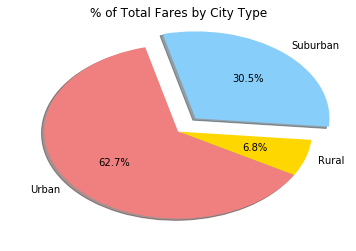

In [13]:
# % of Total Fares by City Type pie chart
fares_df = combo_df[['type','fare']]
fare_group = fares_df.groupby('type')['fare'].sum()
fare_group_df = pd.DataFrame(fare_group)
fare_group_df = fare_group_df.reset_index()
fare_group_df['fare'] = fare_group_df['fare'].map('{:.2f}'.format)
#figure out how to incorprate dollar amounts on graph?
fare_explode = [0,.2,0]

plt.pie('fare', labels='type', colors=['gold','lightskyblue','lightcoral'],
        explode=fare_explode, autopct='%1.1f%%', shadow=True, startangle=330, data=fare_group_df)
plt.title('% of Total Fares by City Type')
plt.show()

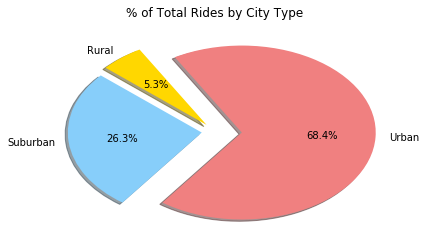

In [12]:
# % of Total Rides by City Type pie chart
rides_group_df = combo_df.groupby('type')['ride_id'].count()
rides_group_df = rides_group_df.reset_index()
rides_group_df = rides_group_df.rename(columns={'ride_id':'No. of Rides'})
rides_group_df.head()

rides_explode = [.1,.1,.2]
plt.pie('No. of Rides', labels='type', colors=['gold','lightskyblue','lightcoral'],
          explode=rides_explode, autopct='%1.1f%%', shadow=True, startangle=120, data=rides_group_df)
plt.title('% of Total Rides by City Type')
plt.show()

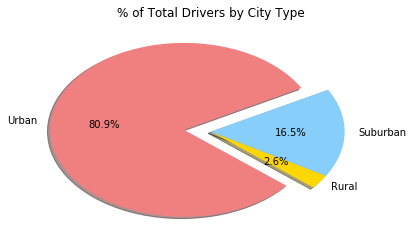

In [15]:
#% of Total Drivers by City Type

drivers_group_df = combo_df[['city','driver_count','type']]
drivers_group_df = drivers_group_df.drop_duplicates()
drivers_group_df = drivers_group_df.groupby('type')['driver_count'].sum()
drivers_group_df = drivers_group_df.reset_index()
drivers_group_df = drivers_group_df.rename(columns={'driver_count':'No. of Drivers'})
drivers_group_df.head()

drivers_explode = [0,0,.2]
plt.pie(drivers_group_df['No. of Drivers'], labels=drivers_group_df['type'], colors=['gold','lightskyblue','lightcoral'],
        explode=drivers_explode, autopct='%1.1f%%', shadow=True, startangle=320)
plt.title('% of Total Drivers by City Type')
plt.show()